# Regularization and Gradient Descent Exercises
![UnderOverFit.png](Assets/UnderOverFit.png)


# Learning Objectives

- Explain cost functions, regularization, feature selection, and hyper-parameters
- Summarize complex statistical optimization algorithms like gradient descent and its application to linear regression
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`.

In [2]:
from __future__ import print_function
import os

# Data path
data_path = '/content/X_Y_Sinusoid_Data.csv'

# Required imports
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Question 1

* Import the data.

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [3]:
from __future__ import print_function
import os
import pandas as pd # Import the pandas library

# Data path
data_path = '/content/X_Y_Sinusoid_Data.csv'

# Required imports
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data into a pandas DataFrame called 'data'
data = pd.read_csv(data_path) # Load data from CSV file

# Display the count of each data type
print(data.dtypes.value_counts())

float64    2
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ensure inline plots in Jupyter Notebooks
%matplotlib inline

# Set up visualization styles
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')


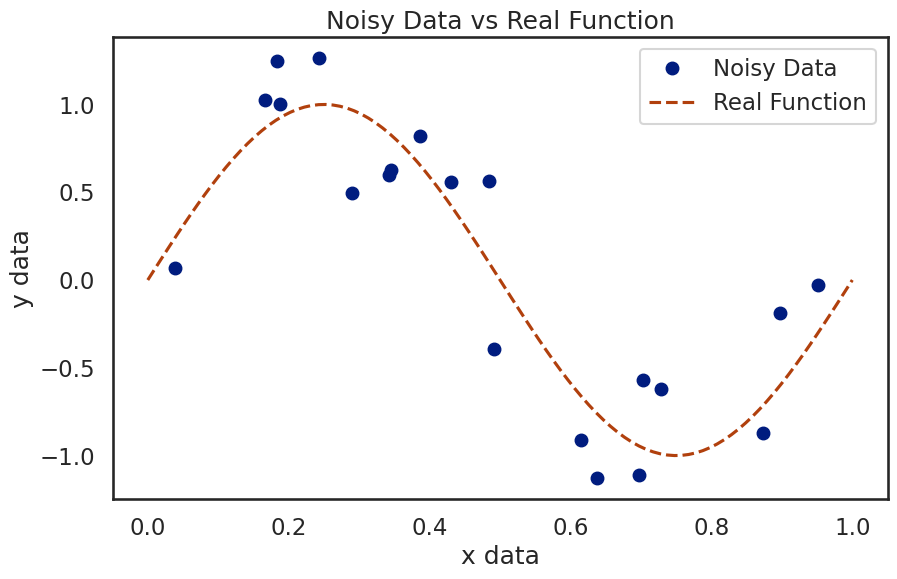

In [8]:
# Plot the noisy data (sparse data from the CSV file)
# Generate equally spaced x data points over the range [0, 1]
X_real = np.linspace(0, 1.0, 100)

# Calculate y values for the "real" function using y = sin(2πx)
Y_real = np.sin(2 * np.pi * X_real)

plt.figure(figsize=(10, 6))
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='Noisy Data')

# Plot the real data (ground truth function)
ax.plot(X_real, Y_real, ls='--', marker='', label='Real Function')

# Add labels and title
ax.legend()
ax.set(xlabel='x data', ylabel='y data', title='Noisy Data vs Real Function')
plt.show()


## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression.
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ensure that the x data is in the correct shape (2D array)
X_data = data['x'].values.reshape(-1, 1)

# Initialize the PolynomialFeatures class with degree 20
poly = PolynomialFeatures(degree=20)

# Transform the original data to include polynomial features
X_poly = poly.fit_transform(X_data)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_poly, data['y'])

# Generate predicted values using the fitted model
Y_pred = model.predict(X_poly)


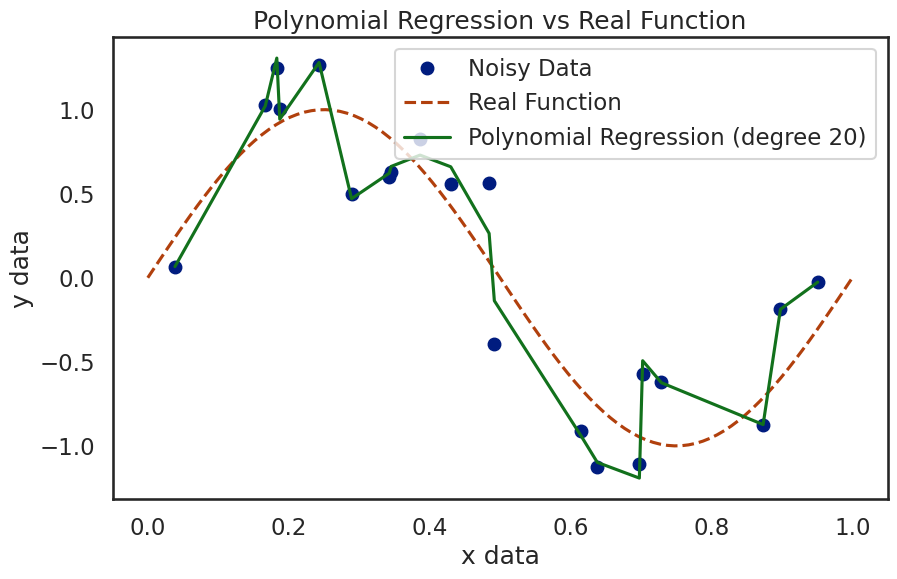

In [10]:
# Plot the noisy data and real function
plt.figure(figsize=(10, 6))

# Plot the noisy (sparse) data
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='Noisy Data')

# Plot the real function (ground truth)
ax.plot(X_real, Y_real, ls='--', marker='', label='Real Function')

# Plot the predicted polynomial regression values
ax.plot(X_data, Y_pred, ls='-', marker='', label='Polynomial Regression (degree 20)')

# Add labels and title
ax.legend()
ax.set(xlabel='x data', ylabel='y data', title='Polynomial Regression vs Real Function')
plt.show()


## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
* Plot the results, as was done in Question 1.
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?

In [11]:
from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge and Lasso regression models with specified alphas
ridge = Ridge(alpha=0.001)
lasso = Lasso(alpha=0.0001)

# Fit the models on the polynomial features
ridge.fit(X_poly, data['y'])
lasso.fit(X_poly, data['y'])

# Generate predictions for Ridge and Lasso
Y_ridge_pred = ridge.predict(X_poly)
Y_lasso_pred = lasso.predict(X_poly)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


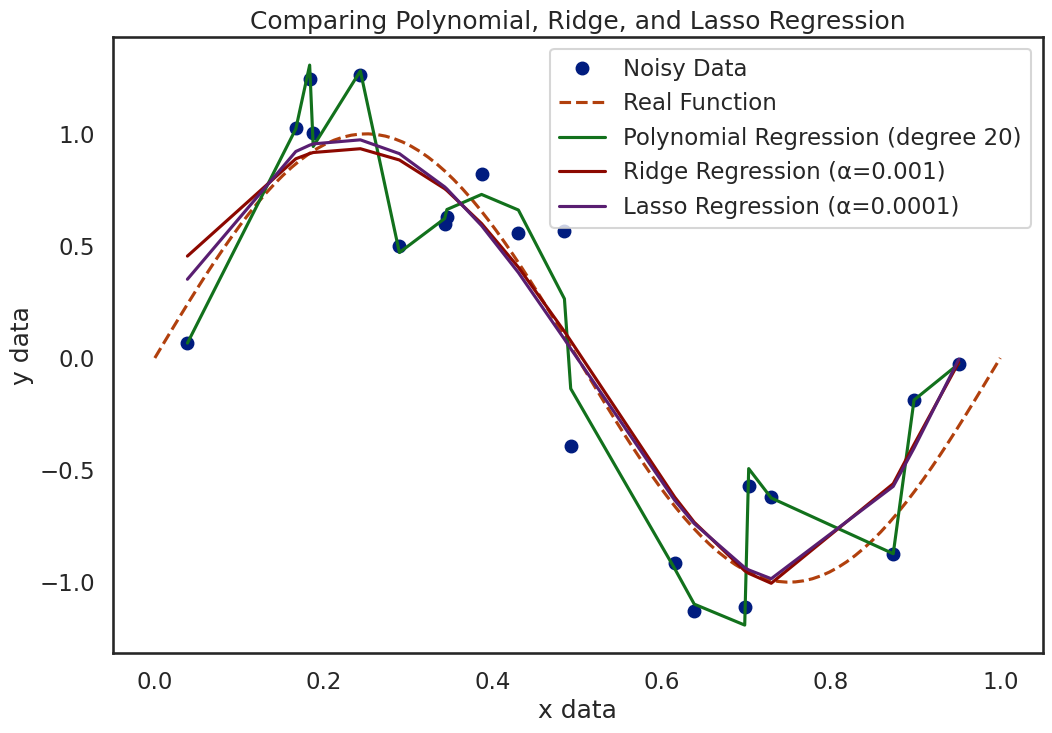

In [12]:
# Plot the noisy data, real function, and regression results
plt.figure(figsize=(12, 8))

# Plot the noisy (sparse) data
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='Noisy Data')

# Plot the real function (ground truth)
ax.plot(X_real, Y_real, ls='--', marker='', label='Real Function')

# Plot the predictions for Linear Regression, Ridge, and Lasso
ax.plot(X_data, Y_pred, ls='-', marker='', label='Polynomial Regression (degree 20)')
ax.plot(X_data, Y_ridge_pred, ls='-', marker='', label='Ridge Regression (α=0.001)')
ax.plot(X_data, Y_lasso_pred, ls='-', marker='', label='Lasso Regression (α=0.0001)')

# Add labels and title
ax.legend()
ax.set(xlabel='x data', ylabel='y data', title='Comparing Polynomial, Ridge, and Lasso Regression')
plt.show()


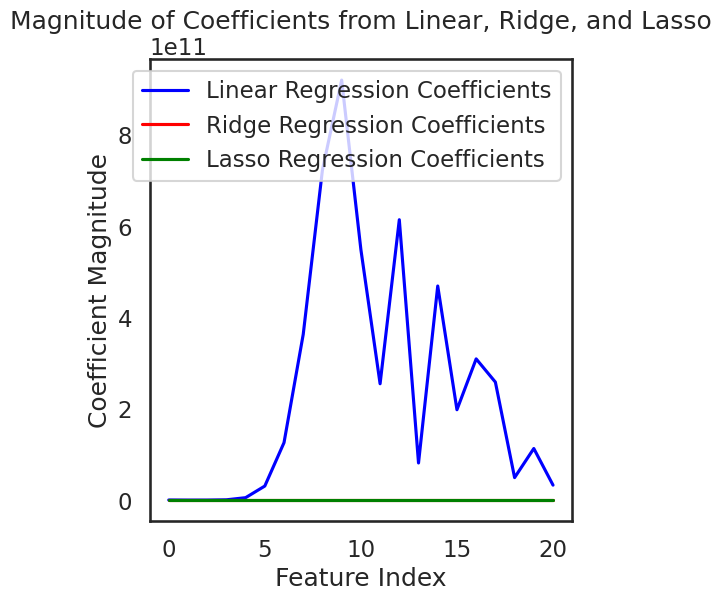

In [13]:
# Plot the magnitudes of the coefficients from Linear, Ridge, and Lasso regressions
plt.figure(figsize=(12, 6))

# Plot Linear Regression Coefficients
plt.subplot(1, 2, 1)
plt.plot(np.abs(model.coef_), label='Linear Regression Coefficients', color='blue')

# Plot Ridge Regression Coefficients
plt.plot(np.abs(ridge.coef_), label='Ridge Regression Coefficients', color='red')

# Plot Lasso Regression Coefficients
plt.plot(np.abs(lasso.coef_), label='Lasso Regression Coefficients', color='green')

# Add labels and legend
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Magnitude of Coefficients from Linear, Ridge, and Lasso')
plt.legend()

# Show the plot
plt.show()


## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets.
* Log transform skewed features.
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [15]:
import pandas as pd

# Load the Ames housing dataset
# Replace the path with the actual dataset path
data_path = '/content/X_Y_Sinusoid_Data.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.

In [16]:
# Check for null values in the dataset
print(df.isnull().sum())

# Drop rows with missing values (alternative: fillna())
df = df.dropna()

# Alternatively, you can fill missing values with the median or mode if necessary
# df = df.fillna(df.median())


x    0
y    0
dtype: int64


Next, split the data in train and test data sets.

In [17]:
# One-hot encode categorical features using pandas get_dummies method
df_encoded = pd.get_dummies(df, drop_first=True)

# Alternatively, using OneHotEncoder from scikit-learn if desired
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False, drop='first')
# categorical_features = df.select_dtypes(include=['object']).columns
# encoded_categoricals = encoder.fit_transform(df[categorical_features])


There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

In [ ]:
# Create a list of float colums to check for skewing


In [18]:
import numpy as np

# Check skewness of the numerical features
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns
skewness = df_encoded[numeric_features].skew()

# Identify skewed features
skewed_features = skewness[skewness > 0.75].index

# Apply log transformation to skewed features
for feature in skewed_features:
    df_encoded[feature] = np.log1p(df_encoded[feature])  # log1p handles log(0)


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

In [23]:
# Assuming 'y' is the target variable (house price)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Mute the setting wtih a copy warnings


Separate features from predictor.

In [24]:
from sklearn.preprocessing import StandardScaler

# Optionally, scale the features if desired
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) between true and predicted values.

    Parameters:
    - y_true: array-like, True values
    - y_pred: array-like, Predicted values

    Returns:
    - rmse: float, Root Mean Squared Error
    """
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Return the square root of MSE to get RMSE
    return np.sqrt(mse)



* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [30]:
# Assuming 'y' is the target variable and you have a trained model
# Replace 'model' with your actual model variable

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE using the actual and predicted values from the test set
result = rmse(y_test, y_pred)

print(f'RMSE: {result}')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 21 features as input.

In [31]:
# Assuming 'model' is the trained LinearRegression model from Question 2
# and 'poly' is the PolynomialFeatures object used for transformation

# Transform the test data using the same PolynomialFeatures object
X_test_poly = poly.transform(X_test)

# Now make predictions using the transformed test data
y_pred = model.predict(X_test_poly)

# Calculate RMSE using the actual and predicted values from the test set
result = rmse(y_test, y_pred)

print(f'RMSE: {result}')

RMSE: 0.03851972805302722


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

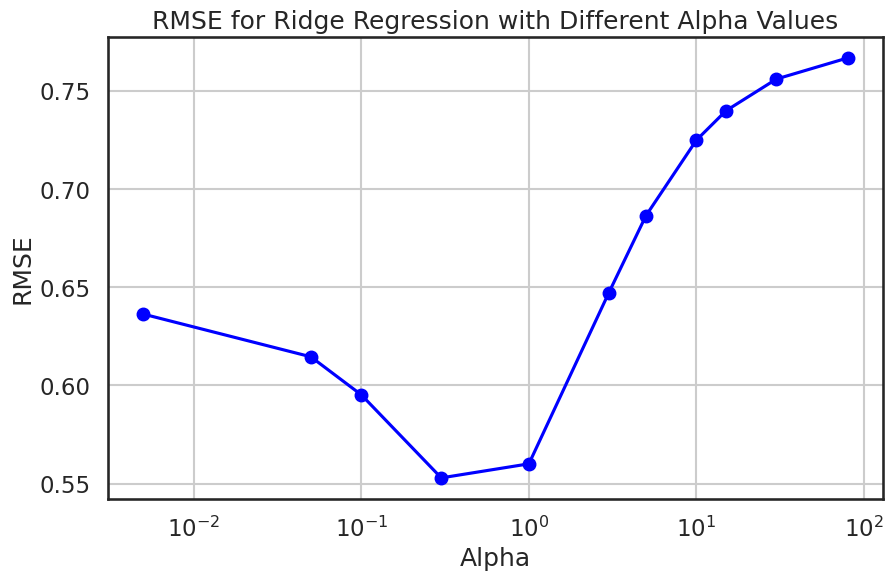

In [36]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = df.drop(columns=['y'])  # Replace 'SalePrice' with your target column
y = df['y']  # Replace with the target column

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of alphas
alpha_values = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# Initialize a list to store RMSE values
rmse_values = []

# Fit Ridge regression models for each alpha and compute the RMSE
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_val = rmse(y_test, y_pred)
    rmse_values.append(rmse_val)

# Plot RMSE vs Alpha values
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, rmse_values, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE for Ridge Regression with Different Alpha Values')
plt.grid(True)
plt.show()


In [37]:
from sklearn.linear_model import RidgeCV

# Fit RidgeCV model with the same alpha values
ridgecv_model = RidgeCV(alphas=alpha_values, store_cv_values=True)
ridgecv_model.fit(X_train, y_train)

# Get the best alpha and RMSE
best_alpha = ridgecv_model.alpha_
y_pred_cv = ridgecv_model.predict(X_test)
rmse_cv = rmse(y_test, y_pred_cv)

print(f'Best Alpha from RidgeCV: {best_alpha}')
print(f'RMSE from RidgeCV: {rmse_cv}')


Best Alpha from RidgeCV: 0.3
RMSE from RidgeCV: 0.5529245675017052


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [38]:
from sklearn.linear_model import LassoCV

# Define the range of alphas
alpha_values_lasso = [1e-5, 5e-5, 0.0001, 0.0005]

# Fit LassoCV with cross-validation
lasso_cv_model = LassoCV(alphas=alpha_values_lasso, cv=5)  # 5-fold cross-validation
lasso_cv_model.fit(X_train, y_train)

# Get the optimal alpha and the RMSE
optimal_alpha_lasso = lasso_cv_model.alpha_
y_pred_lasso = lasso_cv_model.predict(X_test)
rmse_lasso = rmse(y_test, y_pred_lasso)

print(f'Optimal Alpha from LassoCV: {optimal_alpha_lasso}')
print(f'RMSE from LassoCV: {rmse_lasso}')


Optimal Alpha from LassoCV: 0.0005
RMSE from LassoCV: 0.6373243945386805


We can determine how many of these features remain non-zero.

In [39]:
from sklearn.linear_model import ElasticNetCV

# Fit ElasticNetCV with cross-validation
elastic_net_cv_model = ElasticNetCV(alphas=alpha_values_lasso, cv=5)  # 5-fold cross-validation
elastic_net_cv_model.fit(X_train, y_train)

# Get the optimal alpha and the RMSE
optimal_alpha_en = elastic_net_cv_model.alpha_
y_pred_en = elastic_net_cv_model.predict(X_test)
rmse_en = rmse(y_test, y_pred_en)

print(f'Optimal Alpha from ElasticNetCV: {optimal_alpha_en}')
print(f'RMSE from ElasticNetCV: {rmse_en}')


Optimal Alpha from ElasticNetCV: 0.0005
RMSE from ElasticNetCV: 0.6360335091074742


Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

          Model  Optimal Alpha      RMSE
0       LassoCV         0.0005  0.637324
1  ElasticNetCV         0.0005  0.636034


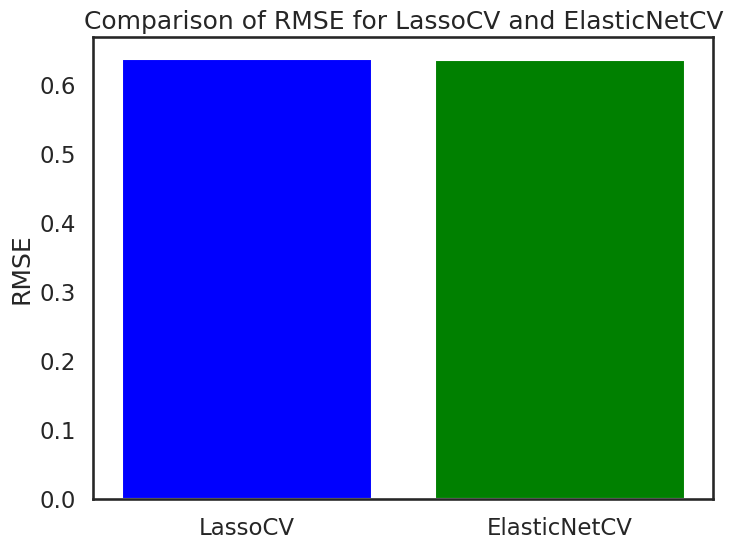

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a comparison table
comparison = pd.DataFrame({
    'Model': ['LassoCV', 'ElasticNetCV'],
    'Optimal Alpha': [optimal_alpha_lasso, optimal_alpha_en],
    'RMSE': [rmse_lasso, rmse_en]
})

print(comparison)

# Plotting the comparison of RMSE for LassoCV and ElasticNetCV
plt.figure(figsize=(8, 6))
models = ['LassoCV', 'ElasticNetCV']
rmse_values = [rmse_lasso, rmse_en]

plt.bar(models, rmse_values, color=['blue', 'green'])
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for LassoCV and ElasticNetCV')
plt.show()


## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

                        Model      RMSE
0  SGD without regularization  0.732454
1         SGD with L2 (Ridge)  0.732457
2         SGD with L1 (Lasso)  0.732568
3         SGD with ElasticNet  0.732513


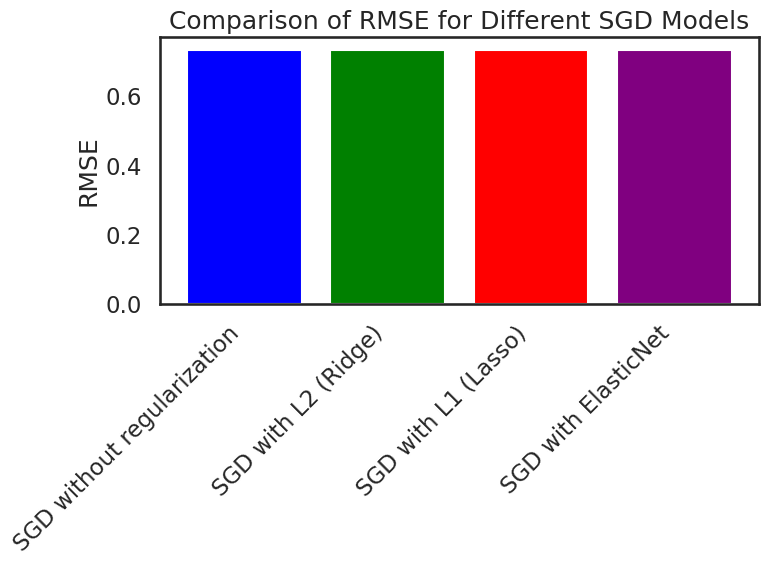

In [46]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
# Step 1: Fit an SGD model without regularization (penalty=None)
sgd_model_none = SGDRegressor(penalty=None, max_iter=1000, tol=1e-3, random_state=42)
sgd_model_none.fit(X_train, y_train) # Changed x_train to X_train

# Calculate RMSE for SGD model without regularization
y_pred_none = sgd_model_none.predict(X_test)  # Predict on the test set
rmse_none = rmse(y_test, y_pred_none)  # Calculate RMSE using your custom function

# Step 2: Fit SGD models with L2, L1, and ElasticNet penalties
sgd_model_l2 = SGDRegressor(penalty='l2', alpha=optimal_alpha_en, max_iter=1000, tol=1e-3, random_state=42)
sgd_model_l2.fit(X_train, y_train) # Changed x_train to X_train

sgd_model_l1 = SGDRegressor(penalty='l1', alpha=optimal_alpha_lasso, max_iter=1000, tol=1e-3, random_state=42)
sgd_model_l1.fit(X_train, y_train) # Changed x_train to X_train

sgd_model_en = SGDRegressor(penalty='elasticnet', alpha=optimal_alpha_en, l1_ratio=0.5, max_iter=1000, tol=1e-3, random_state=42)
sgd_model_en.fit(X_train, y_train) # Changed x_train to X_train

# Predictions and RMSE for each model
y_pred_l2 = sgd_model_l2.predict(X_test)
rmse_l2 = rmse(y_test, y_pred_l2)

y_pred_l1 = sgd_model_l1.predict(X_test)
rmse_l1 = rmse(y_test, y_pred_l1)

y_pred_en = sgd_model_en.predict(X_test)
rmse_en = rmse(y_test, y_pred_en)

# Step 3: Compare the RMSE results
comparison_sgd = pd.DataFrame({
    'Model': ['SGD without regularization', 'SGD with L2 (Ridge)', 'SGD with L1 (Lasso)', 'SGD with ElasticNet'],
    'RMSE': [rmse_none, rmse_l2, rmse_l1, rmse_en]
})

print(comparison_sgd)

# Step 4: Plot the comparison of RMSE
plt.figure(figsize=(8, 6))
models = ['SGD without regularization', 'SGD with L2 (Ridge)', 'SGD with L1 (Lasso)', 'SGD with ElasticNet']
rmse_values = [rmse_none, rmse_l2, rmse_l1, rmse_en]

plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different SGD Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()